### Visualize the FMA dataset genre graph

* generate a graph from track genre labelings
* edge between genres exists if a track is labeled with both genres
* edge-weighting: the number of times the relationship exists



In [26]:
%matplotlib inline

import os
import pandas as pd
import numpy as np

import IPython.display as ipd
import pydot
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations

import utils

#### Load features, tracks, and genres

In [23]:
(features, tracks) = utils.load_features()
genres =  utils.load_genres()


In [24]:
genres.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


#### Build node edge lists/counts for root genre and genre graphs

In [48]:
from ast import literal_eval

all_track_genres = tracks[('track','genres')].apply(lambda x: literal_eval(x)).values

root_edges = {}
root_nodes = {}
genre_edges = {}
genre_nodes = {}

# iterate all tracks
for track_genres in all_track_genres:
    root_titles = {}
    genre_titles = {}
    # iterate all track genres. use dictionaries to consolidate repeated roots
    for genre_id in track_genres: 
        root_id = genres.loc[genre_id]['top_level']
        root_title = genres.loc[root_id]['title']
        genre_title = genres.loc[genre_id]['title']
        root_titles[root_title] = True
        genre_titles[genre_title] = True
        
    root_combos = list(combinations(sorted(root_titles.keys()), 2))
    genre_combos = list(combinations(sorted(genre_titles.keys()), 2))
    for rc in root_combos:
        root_edges[rc] = root_edges.get(rc,0) + 1
        root_nodes[rc[0]] = pydot.Node(rc[0])
        root_nodes[rc[1]] = pydot.Node(rc[1])
    for gc in genre_combos:
        genre_edges[gc] = genre_edges.get(gc,0) + 1
        genre_nodes[gc[0]] = pydot.Node(gc[0])
        genre_nodes[gc[1]] = pydot.Node(gc[1])
    
       
        

In [73]:
### Visualize the graph

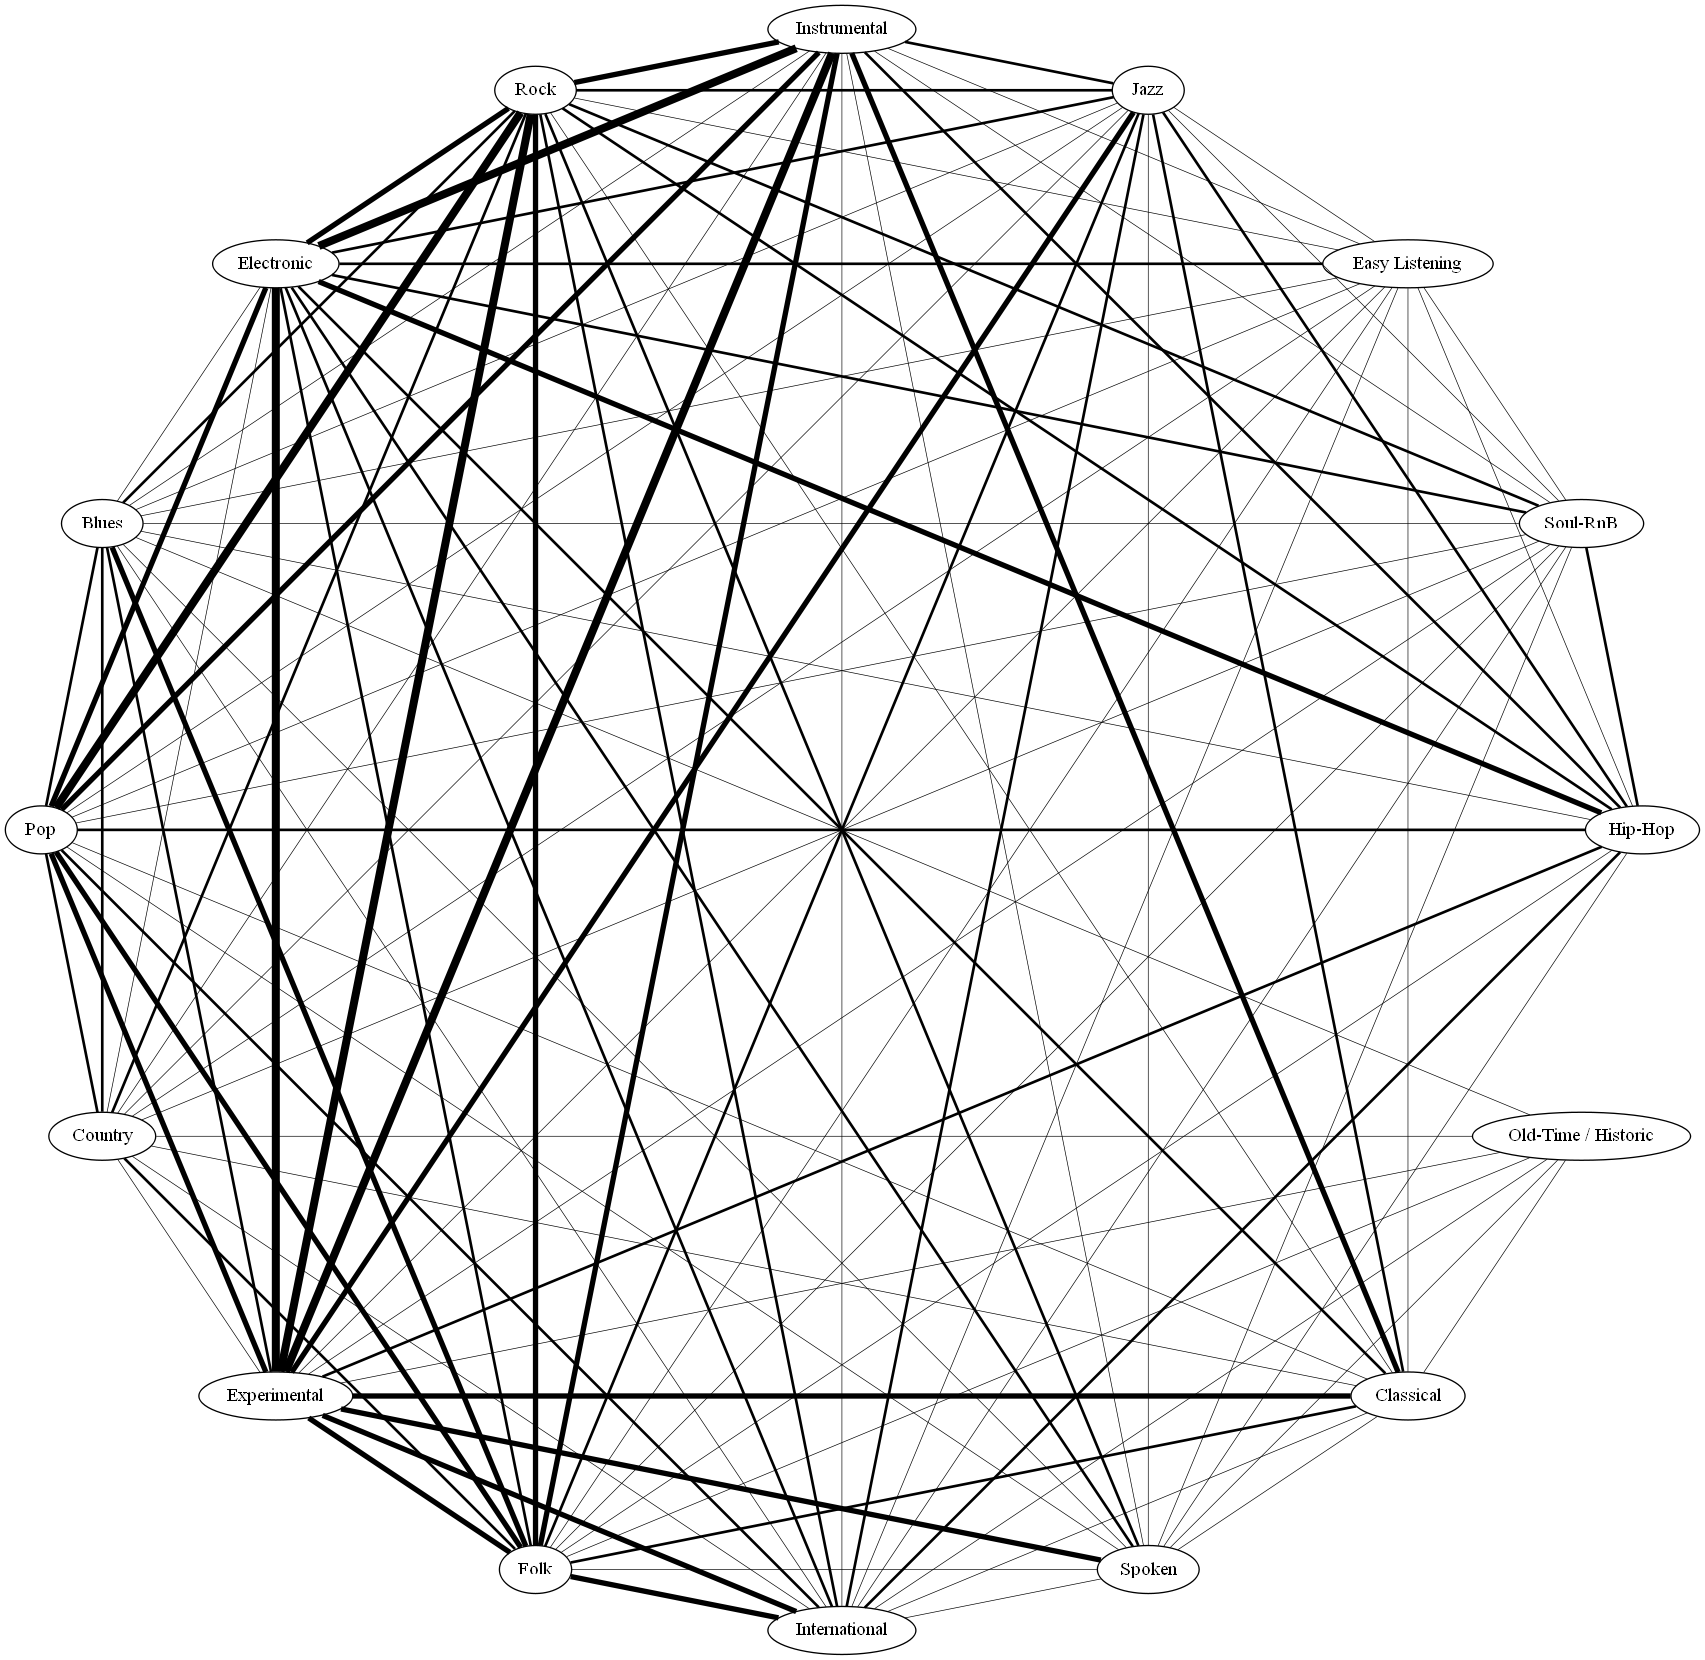

In [72]:
graph = pydot.Dot(graph_type='digraph')

for node in root_nodes.values():
    graph.add_node(node)
    
for edge, count in root_edges.items():
    if count < 10:
        continue
    if count > 5000:
        pw = 6
    elif count > 1000:
        pw = 4
    elif count > 200:
        pw = 2
    else:
        pw = 0.5
    node_1 = root_nodes[edge[0]]
    node_2 = root_nodes[edge[1]]
    graph.add_edge(pydot.Edge(node_1, node_2,dir='none',penwidth=pw))

ipd.display(ipd.Image(graph.create_png(prog='circo')))

In [42]:
root_nodes

{'Pop': <pydot.Node at 0x14480a68d00>,
 'Folk': <pydot.Node at 0x144819a0fd0>,
 'Rock': <pydot.Node at 0x144cfd9afa0>,
 'Electronic': <pydot.Node at 0x144806f1b80>,
 'International': <pydot.Node at 0x14480a7fb50>,
 'Experimental': <pydot.Node at 0x14480b72cd0>,
 'Instrumental': <pydot.Node at 0x144b8f54910>,
 'Jazz': <pydot.Node at 0x14480619af0>,
 'Blues': <pydot.Node at 0x144b8bbb610>,
 'Old-Time / Historic': <pydot.Node at 0x144b8f54ee0>,
 'Classical': <pydot.Node at 0x144805d4880>,
 'Country': <pydot.Node at 0x14480a07b20>,
 'Soul-RnB': <pydot.Node at 0x144805c05b0>,
 'Spoken': <pydot.Node at 0x1448392d910>,
 'Easy Listening': <pydot.Node at 0x1448022bc10>,
 'Hip-Hop': <pydot.Node at 0x144b90ee970>}

In [50]:
root_edges

{('Folk', 'Pop'): 2529,
 ('Pop', 'Rock'): 5578,
 ('Electronic', 'International'): 971,
 ('Experimental', 'Instrumental'): 6085,
 ('Electronic', 'Experimental'): 12470,
 ('Electronic', 'Jazz'): 713,
 ('Experimental', 'Jazz'): 2268,
 ('Blues', 'Jazz'): 119,
 ('Folk', 'Instrumental'): 1022,
 ('International', 'Old-Time / Historic'): 110,
 ('Classical', 'Electronic'): 494,
 ('Folk', 'Rock'): 3773,
 ('International', 'Jazz'): 330,
 ('Electronic', 'Rock'): 4907,
 ('Country', 'Experimental'): 162,
 ('Country', 'Folk'): 974,
 ('Country', 'Rock'): 659,
 ('Experimental', 'Folk'): 3263,
 ('Experimental', 'Rock'): 7028,
 ('Electronic', 'Soul-RnB'): 509,
 ('International', 'Soul-RnB'): 67,
 ('Experimental', 'Spoken'): 1025,
 ('Rock', 'Spoken'): 232,
 ('Easy Listening', 'Experimental'): 129,
 ('Classical', 'Old-Time / Historic'): 29,
 ('Electronic', 'Pop'): 3552,
 ('International', 'Rock'): 972,
 ('Folk', 'International'): 1065,
 ('Electronic', 'Folk'): 772,
 ('Experimental', 'Pop'): 2356,
 ('Folk',